In [76]:
import cv2
import numpy as np

import scipy.signal
from matplotlib import pyplot as plt

In [40]:
size = 500
hsize = size // 2

image = np.zeros((size, size, 3))
image[0:hsize, 0:hsize] = (0, 1.0, 0)
image[0:hsize, hsize:] = (1.0, 0, 0)
image[hsize:, 0:hsize] = (0, 0, 1.0)
image[hsize:, hsize:] = (0, 1.0, 0)

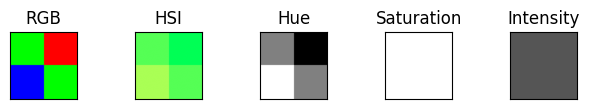

In [106]:
def rgb_to_hsi(rgb):
    r, g, b = rgb

    intensity = rgb.sum() / 3
    saturation = 1 - 3 * rgb.sum() * min(r, g, b)
    
    denominator = np.sqrt((r - g) ** 2 + (r - b) * (g - b))
    if denominator == 0:
        hue = 0
    else:
        numerator = 0.5 * ((r - g) + (r - b))
        theta = np.arccos(numerator / denominator)

        pi2 = 2 * np.pi
        hue = theta if b <= g else pi2 - theta
        hue /= pi2

    return (hue, saturation, intensity)

hsi_image = np.zeros((size, size, 3))

for i in range(size):
    for j in range(size):
        hsi_image[i, j, :] = rgb_to_hsi(image[i, j, :])

plt.subplots(1, 5)
plt.tight_layout()

plt.subplot(1, 5, 1)
plt.title("RGB")
plt.tick_params(axis="both", which="both", bottom=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(image)

plt.subplot(1, 5, 2)
plt.title("HSI")
plt.tick_params(axis="both", which="both", bottom=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(hsi_image)

hue = hsi_image[:, :, 0]
plt.subplot(1, 5, 3)
plt.title("Hue")
plt.tick_params(axis="both", which="both", bottom=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(hue, cmap="gray")

saturation = hsi_image[:, :, 1]
plt.subplot(1, 5, 4)
plt.title("Saturation")
plt.tick_params(axis="both", which="both", bottom=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(saturation, vmin=0.0, vmax=1.0, cmap="gray")

intensity = hsi_image[:, :, 2]
plt.subplot(1, 5, 5)
plt.title("Intensity")
plt.tick_params(axis="both", which="both", bottom=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(intensity, vmin=0.0, vmax=1.0, cmap="gray")

plt.savefig("q1-hsi.png", bbox_inches="tight")

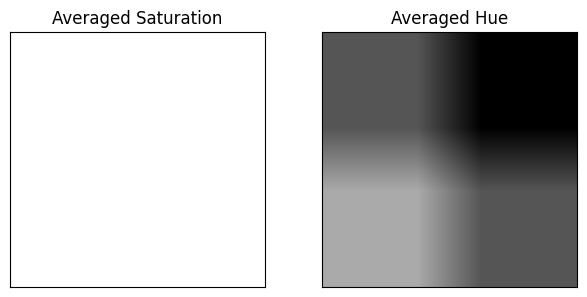

In [107]:
kernel_size = size // 4
kernel = np.ones((kernel_size, kernel_size), dtype=np.float64) / kernel_size / kernel_size

filtered_hue = cv2.blur(hsi_image[:, :, 0], (125, 125))
filtered_saturation = cv2.blur(hsi_image[:, :, 1], (125, 125))

plt.subplots(1, 2)
plt.tight_layout()

plt.subplot(1, 2, 1)
plt.title("Averaged Saturation")
plt.tick_params(axis="both", which="both", bottom=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(filtered_saturation, cmap="gray", vmin=0.0, vmax=1.0)

plt.subplot(1, 2, 2)
plt.title("Averaged Hue")
plt.tick_params(axis="both", which="both", bottom=False, labelbottom=False, left=False, labelleft=False)
plt.imshow(filtered_hue, cmap="gray", vmin=0.0, vmax=1.0)

plt.savefig("q1-averaged.png", bbox_inches="tight")